# Setup locale

In [39]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Path su linux
# Percorso al file
file_path = './data/Dataset3_PortfolioReplicaStrategyErrataCorrige.xlsx'
file_path_old = './data/Dataset3_PortfolioReplicaStrategy.xlsx'

# Path su windows - comando da inserire 
#file_path = "C:/Users/pc/Desktop/politecnico/b-FINTECH/business cases/Fintech_BC/BC2/data/Dataset2_Needs.xls"

# Data Preprocessing


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Excel file with specific structure:
# - Row 4 contains full names
# - Row 6 contains Bloomberg tickers (note: Excel is 1-indexed, pandas is 0-indexed)
# - Data starts from row 7

# Read full names (row 4)
full_names_df = pd.read_excel(file_path_old, header=None, skiprows=3, nrows=1)
full_names = full_names_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Read Bloomberg tickers (row 6)
tickers_df = pd.read_excel(file_path_old, header=None, skiprows=5, nrows=1)
tickers = tickers_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Create a dictionary mapping tickers to full names
variable_info = dict(zip(tickers, full_names))

# Read the actual data without using any row as a header
data_raw = pd.read_excel(file_path, header=None, skiprows=6)

# First column is the date column
data_raw.columns = ['Date'] + tickers  # Assign the columns correctly using tickers

# Set the date column as the index and ensure it's in datetime format
data_raw['Date'] = pd.to_datetime(data_raw['Date'], format='%d/%m/%Y')
data = data_raw.set_index('Date')

# Display the first few rows to examine the dataset structure
print("Dataset preview:")
display(data.head())

# Show the variable information (Ticker -> Full Name)
print("\nVariable Information (Bloomberg Ticker -> Full Name):")
for ticker, name in variable_info.items():
    print(f"{ticker} -> {name}")

# Show basic information about the dataset
print("\nDataset information:")
display(data.info())

# Display statistical summary of the dataset
print("\nBasic statistics:")
display(data.describe())


Dataset preview:


,MXWO Index,MXWD Index,LEGATRUU Index,HFRXGL Index,RX1 Comdty,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Comdty,VG1 Comdty,NQ1 Comdty,LLL1 Comdty,TP1 Comdty,DU1 Comdty,TU2 Comdty
Date,,,,,,,,,,,,,,,
2007-11-27,1561.93,395.11,361.7651,1325.03,115.08,113.953125,814.0,92.52,1426.50,4241.00,2032.50,1196.2,1485.0,103.925,105.101562
2007-12-04,1593.08,404.26,361.2404,1331.55,115.18,114.656250,801.3,89.53,1463.25,4351.00,2062.25,1240.0,1512.0,103.730,105.312500
2007-12-11,1619.77,411.45,357.3778,1337.57,113.74,114.390625,811.4,89.99,1478.00,4458.00,2090.00,1239.0,1568.0,103.585,105.171875
2007-12-18,1556.84,394.00,353.4098,1323.53,113.18,113.640625,803.0,90.12,1455.75,4317.00,2029.25,1180.5,1467.5,103.345,104.828125
2007-12-25,1592.40,403.78,352.2170,1325.46,112.95,112.093750,812.8,92.70,1506.50,4398.63,2148.00,1261.8,1505.0,103.325,104.742188



Variable Information (Bloomberg Ticker -> Full Name):
MXWO Index -> MSCI WORLD
MXWD Index -> MSCI ACWI
LEGATRUU Index -> Global Aggregate
HFRXGL Index -> Hedge Fund Research HFRX Globa
RX1 Comdty -> Generic 1st 'RX' Future
TY1 Comdty -> Generic 1st 'TY' Future
GC1 Comdty -> Generic 1st 'GC' Future
CO1 Comdty -> Generic 1st 'CO' Future
ES1 Comdty -> Generic 1st 'ES' Future
VG1 Comdty -> Generic 1st 'VG' Future
NQ1 Comdty -> Generic 1st 'NQ' Future
LLL1 Comdty -> Generic 1st 'LLL' Future
TP1 Comdty -> Generic 1st 'TP' Future
DU1 Comdty -> Generic 1st 'DU' Future
TU2 Comdty -> Generic 2nd 'TU' Future

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700 entries, 2007-11-27 to 2021-04-20
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MXWO Index      700 non-null    float64
 1   MXWD Index      700 non-null    float64
 2   LEGATRUU Index  700 non-null    float64
 3   HFRXGL Index    70

None


Basic statistics:


,MXWO Index,MXWD Index,LEGATRUU Index,HFRXGL Index,RX1 Comdty,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Comdty,VG1 Comdty,NQ1 Comdty,LLL1 Comdty,TP1 Comdty,DU1 Comdty,TU2 Comdty
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1644.267314,404.093814,452.899518,1209.103114,147.516043,126.071138,1321.658429,76.928814,1963.709429,3062.807400,4543.937500,1062.865714,1275.430000,110.269143,108.659554
std,444.960928,101.335432,46.780155,73.289199,19.181475,6.194732,271.813210,26.866179,771.839312,462.279247,2904.233691,128.012318,354.148215,2.314449,1.490284
min,705.350000,176.100000,342.247100,1021.400000,110.200000,112.093750,732.700000,19.330000,689.500000,1873.000000,1072.000000,465.100000,704.000000,102.190000,104.742188
25%,1288.717500,328.632500,433.645175,1157.365000,129.345000,121.378906,1185.425000,54.165000,1313.000000,2751.500000,2253.187500,1103.600000,904.375000,109.285000,107.904297
50%,1647.170000,402.005000,456.811650,1214.525000,148.300000,126.000000,1283.600000,71.650000,1916.000000,3067.500000,3928.375000,1103.600000,1301.500000,110.882500,109.125000
75%,1984.507500,479.520000,478.317150,1252.545000,163.272500,130.367188,1502.400000,105.862500,2572.562500,3420.250000,6380.687500,1103.600000,1587.625000,111.995000,109.914062
max,2944.050000,702.990000,559.311700,1415.110000,179.320000,140.328125,2001.200000,140.670000,4132.800000,4458.000000,13975.750000,1261.800000,1978.000000,112.720000,110.527344



Correlation with target index:


,Correlation with target index
ES1 Comdty,0.837928
NQ1 Comdty,0.747776
VG1 Comdty,0.730446
TP1 Comdty,0.599413
LLL1 Comdty,0.49532
CO1 Comdty,0.445874
DU1 Comdty,-0.259208
GC1 Comdty,0.215519
TU2 Comdty,-0.148299
RX1 Comdty,-0.129644


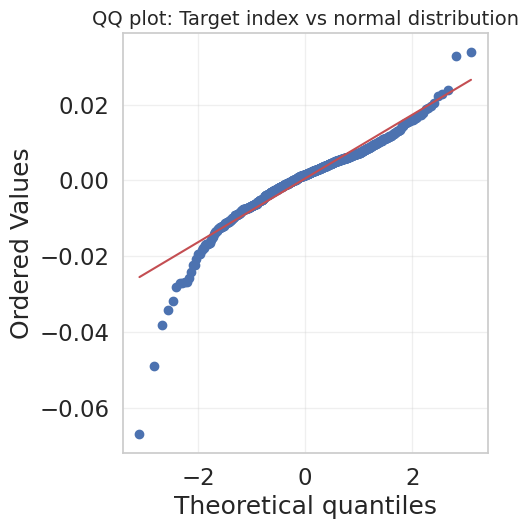

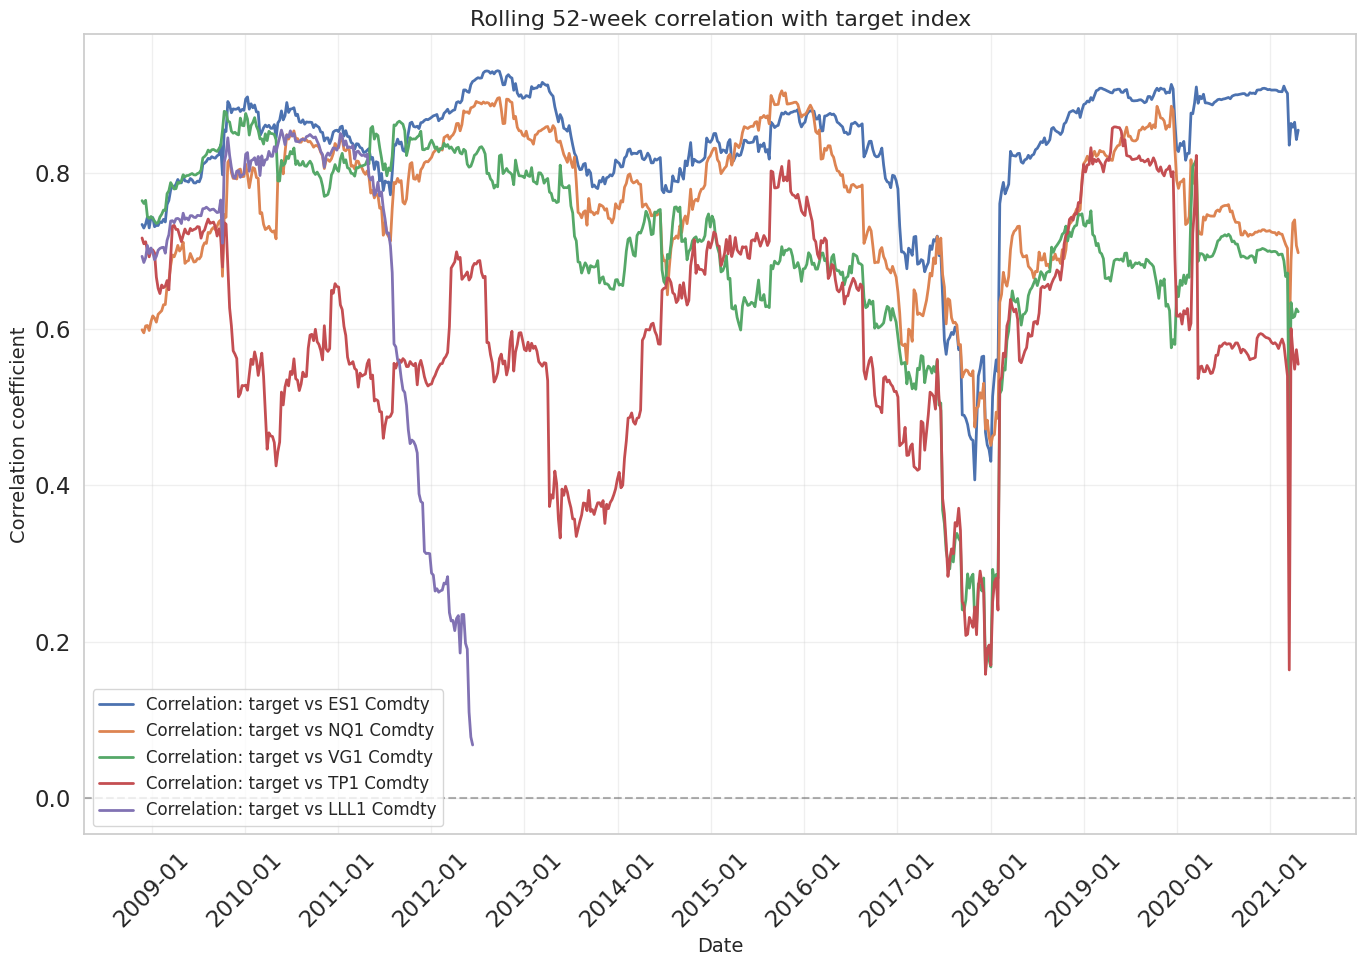

In [41]:
import scipy.stats as stats
import matplotlib.dates as mdates
from statsmodels.graphics.gofplots import qqplot
import warnings

# Suppress specific boring RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

# Define the components of our target index with their weights
# You can be creative, this is just an example
# Monster Index (a crazy combination of large indexes)
index_components = {
    'HFRXGL Index': 0.50,   # Hedge Fund Index - 50%
    'MXWO Index': 0.25,     # MSCI World - 25%
    'LEGATRUU Index': 0.25  # Global Aggregate Bond - 25%
}

# Calculate returns for each component
component_returns = data[list(index_components.keys())].pct_change().dropna()

# Create the target index using weighted returns
weighted_returns = pd.DataFrame(index=component_returns.index)
for component, weight in index_components.items():
    weighted_returns[component] = component_returns[component] * weight

# Sum the weighted returns to get the target index returns
target_returns = weighted_returns.sum(axis=1)
target_returns.name = 'Target_Index'

# Define the futures contracts we'll use for replication
futures_contracts = [
    'RX1 Comdty', 'TY1 Comdty', 'GC1 Comdty', 'CO1 Comdty',
    'ES1 Comdty', 'VG1 Comdty', 'NQ1 Comdty', 'LLL1 Comdty',
    'TP1 Comdty', 'DU1 Comdty', 'TU2 Comdty'
]

# Calculate returns for futures contracts
futures_returns = data[futures_contracts].pct_change().dropna()

# Ensure we're using the same date range for both target and futures
common_dates = futures_returns.index.intersection(target_returns.index)
futures_returns = futures_returns.loc[common_dates]
target_returns_aligned = target_returns.loc[common_dates]

# Calculate correlations between target index and futures contracts using pandas method
# which handles NaN values better than np.corrcoef
correlations = pd.DataFrame(index=futures_contracts,
                           columns=['Correlation with target index'])

for contract in futures_contracts:
    correlations.loc[contract] = target_returns_aligned.corr(futures_returns[contract])

# Sort by absolute correlation value
correlations['Abs correlation'] = correlations['Correlation with target index'].abs()
correlations = correlations.sort_values('Abs correlation', ascending=False)
correlations = correlations.drop('Abs correlation', axis=1)

# Display the correlations
print("\nCorrelation with target index:")
display(correlations)

# Now create the QQ plots
plt.figure(figsize=(16, 12))

# Plot QQ plot for the target index
plt.subplot(2, 3, 1)
stats.probplot(target_returns_aligned.dropna(), dist="norm", plot=plt)
plt.title(f'QQ plot: Target index vs normal distribution', fontsize=14)
plt.grid(True, alpha=0.3)

# Select a few key futures contracts (top 3 by correlation with target)
top_futures = correlations.index[:3].tolist()

# Plot rolling correlations between target index and Futures contracts
rolling_window = 52  # 52 weeks ≈ 1 year
plt.figure(figsize=(14, 10))

# Select top 5 futures by correlation (absolute value)
top_futures = correlations.index[:5].tolist()

for contract in top_futures:
    # Calculate rolling correlation
    combined_df = pd.DataFrame({
        'Target': target_returns_aligned,  # Fixed variable name
        'Future': futures_returns[contract]
    })
    rolling_corr = combined_df['Target'].rolling(rolling_window).corr(combined_df['Future'])

    # Plot
    plt.plot(rolling_corr.index, rolling_corr, linewidth=2,
             label=f"Correlation: target vs {contract}")

plt.title(f'Rolling {rolling_window}-week correlation with target index', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Correlation coefficient', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Models


In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from itertools import product
import math

# Ensure data is properly aligned
y = target_returns_aligned  # Target index returns
#X = futures_returns.loc[y.index]  # Futures returns aligned with target
X = futures_returns.loc[y.index]  # Futures returns aligned with target

# Define hyperparameter grid - this is rough, on purpose: you can do better
l1_ratios = list(map(lambda x: round(x, 2), np.arange(0.0, 0.21, 0.05)))  # Generate l1_ratios with gaps of 0.2
rolling_windows = [52, 104, 156, 208]  # in weeks (1Y, 2Y, 3Y, 4Y)
#alphas = list(map(lambda x: round(x, 2), np.arange(0.0001, 0.01, 0.0002)))
alphas = [0.1, 0.105, 0.11]  # Regularization strength

# VaR parameters
var_confidence = 0.01  # 1% VaR
var_horizon = 4  # 4 weeks (1 month)
max_var_threshold = 0.08  # 20% maximum VaR(1%, 1 month)

# Convert to numpy arrays for easier indexing
X_values = X.values
y_values = y.values
dates_array = X.index.to_numpy()

# Suppress boring warnings during the loop
import warnings
warnings.filterwarnings('ignore')

# Function to calculate VaR
def calculate_var(returns, confidence=0.01, horizon=4):
    """
    Calculate Value at Risk (VaR) using a simple Gaussian model (you can do better)

    Parameters:
    returns (array-like): Historical returns
    confidence (float): Confidence level (e.g., 0.01 for 1% VaR)
    horizon (int): Time horizon in weeks

    Returns:
    float: VaR as a positive number (loss)
    """
    # Calculate standard deviation of returns
    sigma = np.std(returns)

    # Calculate VaR using a Gaussian model
    # For a loss, we use the negative of the quantile
    # We use the negative of the quantile because VaR represents a loss
    # Note: this is just a a widespread and questionable practice (which I do not loke because it is ambiguous, there could be a positive VaR)
    #z_score = stats.norm.ppf(confidence)
    z_score = stats.t.ppf(confidence, df=len(returns)-1)

    # Scale to the desired time horizon
    var = -z_score * sigma * np.sqrt(horizon)

    return var

# def calculate_var(returns, confidence=0.01, horizon=4):
#     """
#     Calculate Value at Risk (VaR) using a simple Gaussian model (you can do better)

#     Parameters:
#     returns (array-like): Historical returns
#     confidence (float): Confidence level (e.g., 0.01 for 1% VaR)
#     horizon (int): Time horizon in weeks

#     Returns:
#     float: VaR as a positive number (loss)
#     """

#     loss = [-r for r in returns]
#     loss_sorted = sorted(loss, reverse=True)
#     n=len(returns)
#     index=math.floor(n*confidence)
#     var=loss[index]

#     return var

# Function to run a single configuration with normalized returns and proper VaR scaling
def run_elastic_net_normalized(l1_ratio, rolling_window, alpha, transaction_cost=0.005):
    # Initialize arrays to store results
    weights_history = []  # Store weights over time
    replica_returns = []  # Store replica portfolio returns
    target_dates = []  # Store dates for plotting
    gross_exposures = []  # Store gross exposure over time
    var_values = []  # Store VaR values over time
    scaling_factors = []  # Store scaling factors applied
    transaction_costs_history = []  # Store transaction costs over time
    previous_weights = None

    # Loop through the data using a rolling window approach as explained before
    for i in range(len(X) - rolling_window - 1):
        # Define training window
        start_idx = i
        end_idx = i + rolling_window

        # Extract training data
        X_train = X_values[start_idx:end_idx]
        y_train = y_values[start_idx:end_idx]

        # Normalize the training data using MinMaxScaler
        scaler_X = MinMaxScaler()
        X_train_normalized = scaler_X.fit_transform(X_train)

        # Normalize target
        scaler_y = MinMaxScaler()
        y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

        # Fit Elastic Net model with a given alpha
        model = ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            fit_intercept=False,
            max_iter=10000,
            tol=1e-4
        )

        model.fit(X_train_normalized, y_train_normalized)

        # Get the normalized weights
        normalized_weights = model.coef_

        # Calculate weights for original scale
        original_weights = normalized_weights / scaler_X.scale_

        # Default scaling factor
        scaling_factor = 1.0

        # If we have enough historical data, calculate VaR and scale if needed
        if len(replica_returns) >= 12:  # Need some history to calculate VaR...
            # Calculate historical replica returns using current weights
            historical_returns = []
            for j in range(max(0, len(replica_returns)-52), len(replica_returns)):
                # Get historical futures returns for this period
                hist_returns = X_values[end_idx-(len(replica_returns)-j)]
                # Calculate weighted return
                weighted_return = np.dot(hist_returns, original_weights)
                historical_returns.append(weighted_return)

            # Calculate VaR
            var = calculate_var(
                historical_returns,
                confidence=var_confidence,
                horizon=var_horizon
            )

            # Scale weights if VaR exceeds threshold
            if var > max_var_threshold:
                scaling_factor = max_var_threshold / var
                original_weights = original_weights * scaling_factor

                # Recalculate VaR after scaling to verify
                scaled_historical_returns = [ret * scaling_factor for ret in historical_returns]
                scaled_var = calculate_var(
                    scaled_historical_returns,
                    confidence=var_confidence,
                    horizon=var_horizon
                )

                var = scaled_var  # Update VaR value after scaling

            var_values.append(var)
        else:
            var_values.append(np.nan)

        # Store scaling factor
        scaling_factors.append(scaling_factor)

        # Calculate gross exposure (sum of absolute weights) after scaling
        gross_exposure = np.sum(np.abs(original_weights))
        gross_exposures.append(gross_exposure)

        # Calculate transaction costs if we have previous weights
        if previous_weights is not None:
            # Calculate absolute weight changes
            weight_changes = np.abs(original_weights - previous_weights)
            # Sum up and multiply by transaction cost rate
            period_transaction_cost = np.sum(weight_changes) * transaction_cost
            transaction_costs_history.append(period_transaction_cost)
        else:
            # For the first period, assume we're building the portfolio from scratch
            period_transaction_cost = np.sum(np.abs(original_weights)) * transaction_cost
            transaction_costs_history.append(period_transaction_cost)

        # Store the weights after scaling
        weights_history.append(original_weights)
        # Update previous weights for next iteration
        previous_weights = original_weights.copy()

        # Calculate replica return for the next period (t+1)
        next_returns = X_values[end_idx]  # This is t+1

        # Use scaled original weights with original returns
        replica_return = np.dot(next_returns, original_weights)
        
        # Subtract transaction costs from the return
        replica_return_after_costs = replica_return - period_transaction_cost

        replica_returns.append(replica_return_after_costs)


        # Store the date for t+1
        target_dates.append(dates_array[end_idx])

    # Convert results to pandas series for easier analysis
    replica_returns_series = pd.Series(replica_returns, index=target_dates)

    # Calculate cumulative returns for both target and replica
    aligned_target = y.loc[replica_returns_series.index]
    cumulative_target = (1 + aligned_target).cumprod()
    cumulative_replica = (1 + replica_returns_series).cumprod()

    # Calculate performance metrics
    replica_mean_return = replica_returns_series.mean() * 52  # annualized
    target_mean_return = aligned_target.mean() * 52  # annualized

    replica_vol = replica_returns_series.std() * np.sqrt(52)  # annualized
    target_vol = aligned_target.std() * np.sqrt(52)  # annualized

    replica_sharpe = replica_mean_return / replica_vol if replica_vol > 0 else 0
    target_sharpe = target_mean_return / target_vol if target_vol > 0 else 0

    # Calculate tracking error
    tracking_error = (replica_returns_series - aligned_target).std() * np.sqrt(52)
    information_ratio = (replica_mean_return - target_mean_return) / tracking_error if tracking_error > 0 else 0

    # Calculate drawdowns
    replica_drawdown = 1 - cumulative_replica / cumulative_replica.cummax()
    target_drawdown = 1 - cumulative_target / cumulative_target.cummax()

    # Calculate correlation
    correlation = replica_returns_series.corr(aligned_target)

    # Calculate average gross exposure
    avg_gross_exposure = np.mean(gross_exposures)

    # Calculate average VaR (excluding NaN values)
    avg_var = np.nanmean(var_values)

    # Return all metrics
    return {
        'l1_ratio': l1_ratio,
        'rolling_window': rolling_window,
        'alpha': alpha,
        'replica_return': replica_mean_return,
        'target_return': target_mean_return,
        'replica_vol': replica_vol,
        'target_vol': target_vol,
        'replica_sharpe': replica_sharpe,
        'target_sharpe': target_sharpe,
        'tracking_error': tracking_error,
        'information_ratio': information_ratio,
        'correlation': correlation,
        'max_drawdown': replica_drawdown.max(),
        'avg_gross_exposure': avg_gross_exposure,
        'avg_var': avg_var,
        'replica_returns': replica_returns_series,
        'aligned_target': aligned_target,
        'cumulative_replica': cumulative_replica,
        'cumulative_target': cumulative_target,
        'gross_exposures': gross_exposures,
        'var_values': var_values,
        'scaling_factors': scaling_factors,
        'weights_history': weights_history
    }

# Run all combinations with normalized returns
results_normalized = []

for l1_ratio, rolling_window, alpha in product(l1_ratios, rolling_windows, alphas):
    result = run_elastic_net_normalized(l1_ratio, rolling_window, alpha)
    results_normalized.append(result)

# Convert results to DataFrame for easier analysis
results_df_normalized = pd.DataFrame(results_normalized)

# Sort by information ratio (higher is better) - our primary objective
sorted_results_normalized = results_df_normalized.sort_values(by='information_ratio', ascending=False)

# Display top 10 configurations by information ratio
print("\nTop 10 configurations by information ratio (normalized returns):")
display(sorted_results_normalized[['l1_ratio', 'rolling_window', 'alpha', 'information_ratio', 'correlation',
                       'tracking_error', 'replica_sharpe', 'avg_gross_exposure', 'avg_var']].head(10))

# Get the best configuration by information ratio
best_config_normalized = sorted_results_normalized.iloc[0]
print(f"\nBest configuration by information ratio (normalized returns): l1_ratio={best_config_normalized['l1_ratio']}, "
      f"rolling_window={best_config_normalized['rolling_window']}, alpha={best_config_normalized['alpha']}")



Top 10 configurations by information ratio (normalized returns):


,l1_ratio,rolling_window,alpha,information_ratio,correlation,tracking_error,replica_sharpe,avg_gross_exposure,avg_var
6,0.00,156,0.100,-0.370015,0.668529,0.041474,0.717287,0.181648,0.019485
7,0.00,156,0.105,-0.372713,0.667487,0.041537,0.716607,0.180620,0.019371
8,0.00,156,0.110,-0.375301,0.666493,0.041598,0.715970,0.179631,0.019260
18,0.05,156,0.100,-0.402564,0.686010,0.040968,0.716681,0.177626,0.018436
19,0.05,156,0.105,-0.405507,0.685015,0.041041,0.715852,0.176491,0.018310
3,0.00,104,0.100,-0.405716,0.670345,0.042021,0.695419,0.164910,0.018761
4,0.00,104,0.105,-0.407652,0.669380,0.042082,0.695111,0.164022,0.018660
20,0.05,156,0.110,-0.408323,0.684070,0.041110,0.715100,0.175396,0.018188
5,0.00,104,0.110,-0.409534,0.668463,0.042141,0.694831,0.163164,0.018561
30,0.10,156,0.100,-0.437705,0.703347,0.040597,0.711416,0.173324,0.017331



Best configuration by information ratio (normalized returns): l1_ratio=0.0, rolling_window=156, alpha=0.1



Detailed metrics for the best configuration (normalized returns):


,Metric,Target,Replica
0,Annualized return,3.85%,2.31%
1,Annualized volatility,5.54%,3.22%
2,Sharpe ratio,0.69,0.72
3,Max Drawdown,5.87%,5.87%
4,Tracking Error,N/A,4.15%
5,Information ratio,N/A,-0.37
6,Correlation,N/A,0.6685
7,Average gross exposure,N/A,0.1816
8,"Average VaR (1%, 1M)",N/A,1.95%


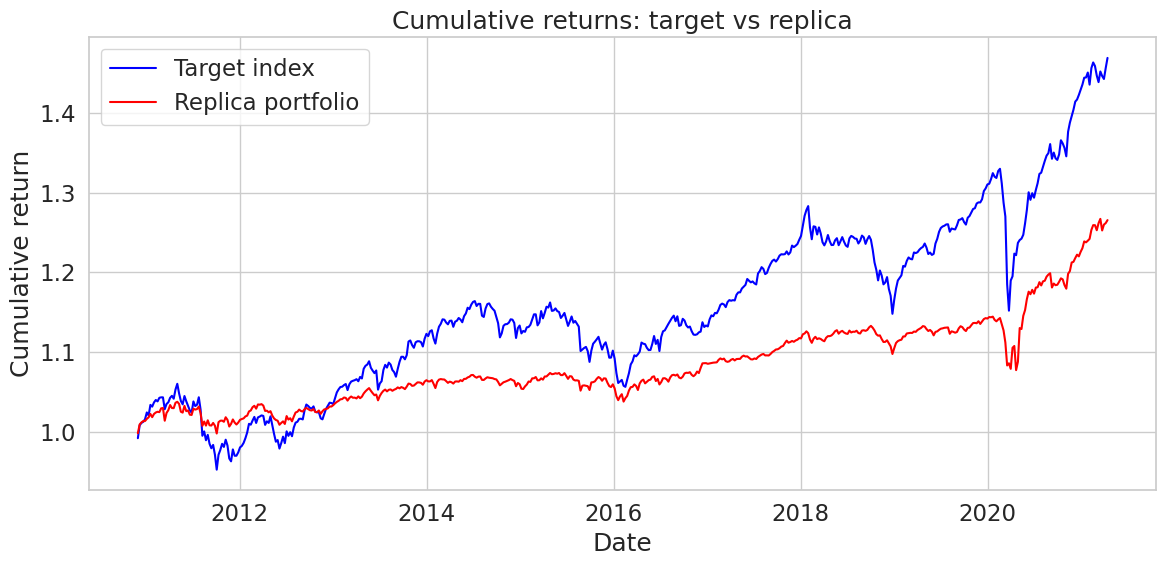

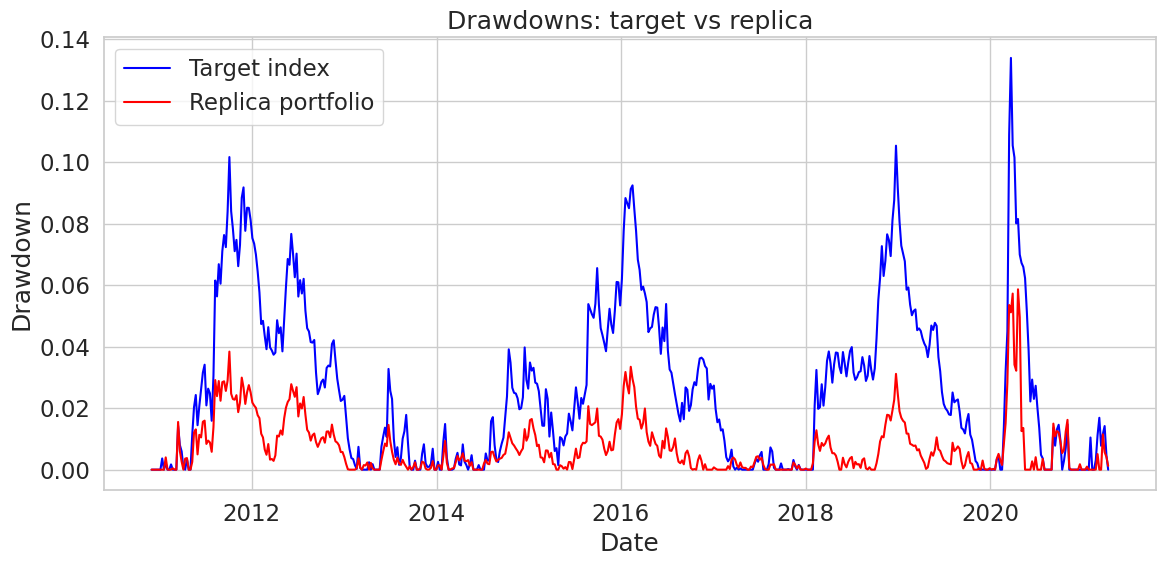

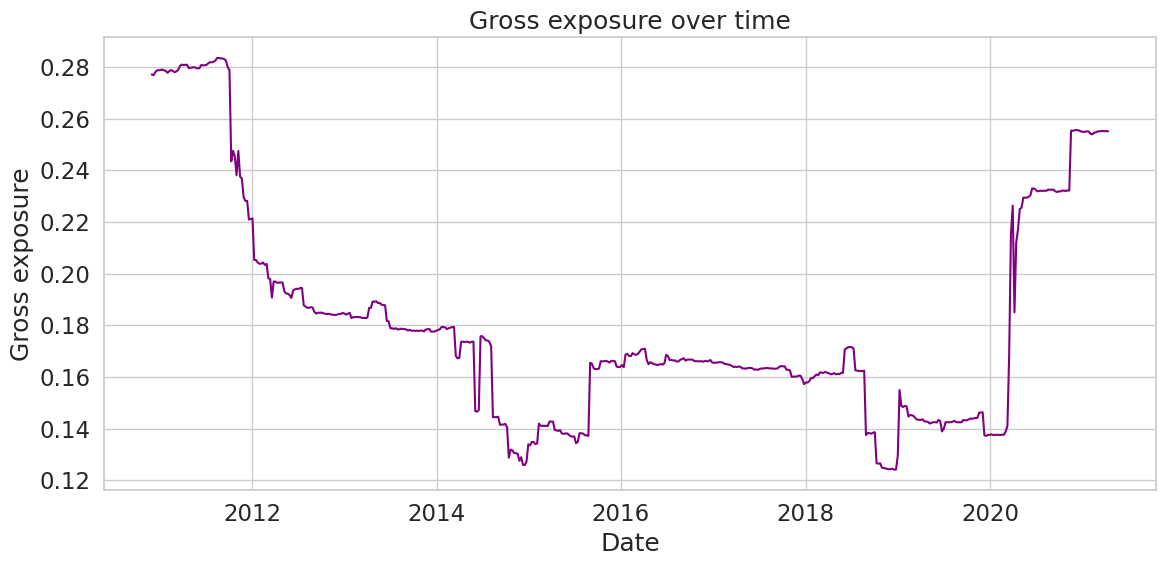

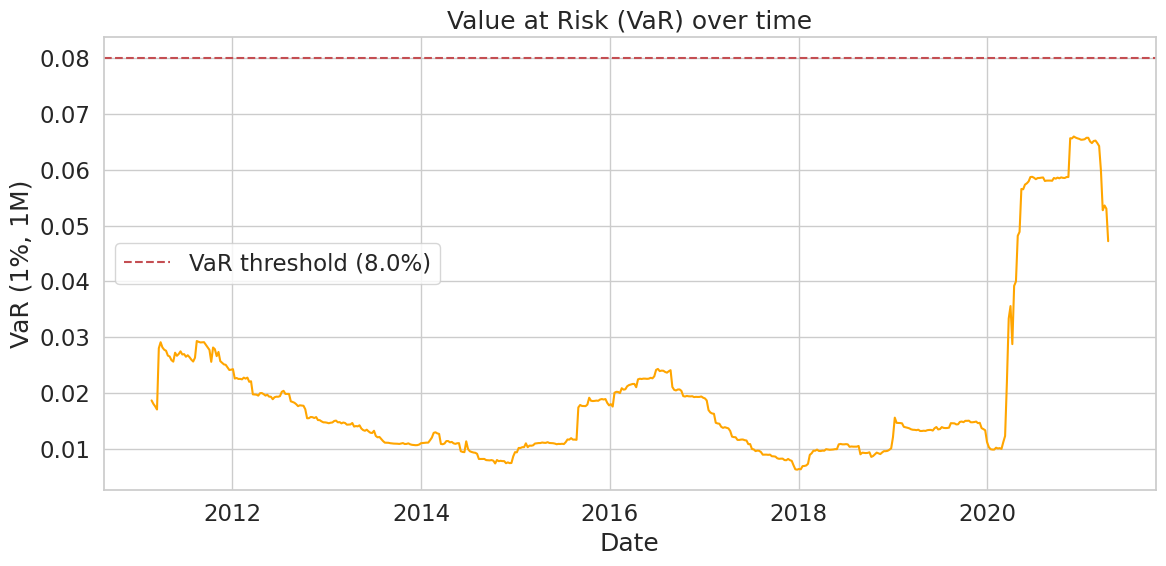

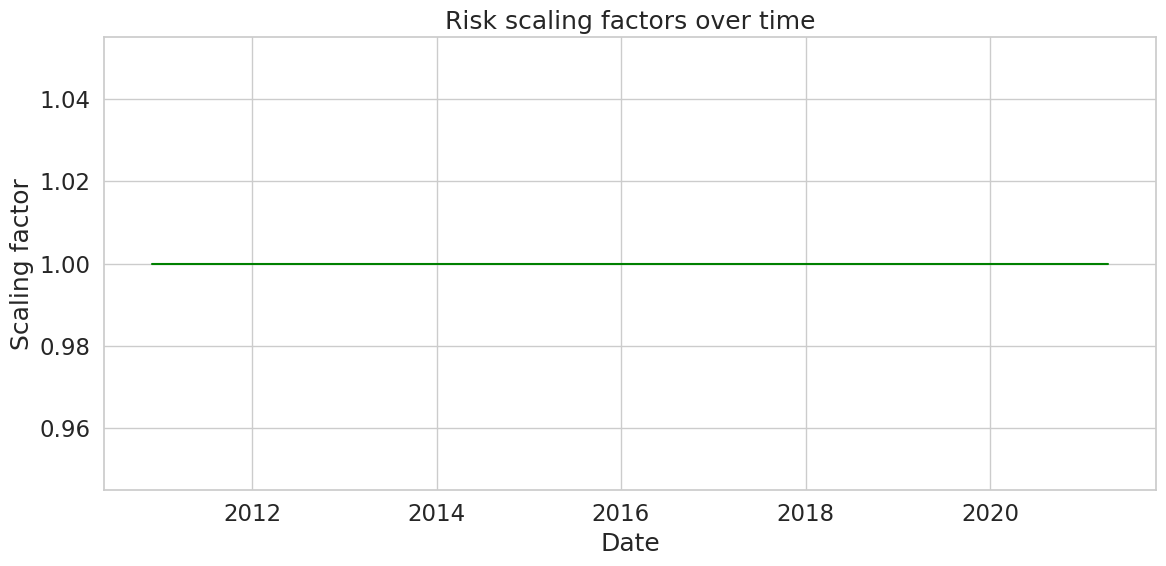

In [51]:
# Create detailed metrics table for the best configuration
metrics_normalized = pd.DataFrame({
    'Metric': ['Annualized return', 'Annualized volatility', 'Sharpe ratio',
               'Max Drawdown', 'Tracking Error', 'Information ratio',
               'Correlation', 'Average gross exposure', 'Average VaR (1%, 1M)'],
    'Target': [f"{best_config_normalized['target_return']*100:.2f}%",
               f"{best_config_normalized['target_vol']*100:.2f}%",
               f"{best_config_normalized['target_sharpe']:.2f}",
               f"{best_config_normalized['max_drawdown']*100:.2f}%",
               "N/A",
               "N/A",
               "N/A",
               "N/A",
               "N/A"],
    'Replica': [f"{best_config_normalized['replica_return']*100:.2f}%",
                f"{best_config_normalized['replica_vol']*100:.2f}%",
                f"{best_config_normalized['replica_sharpe']:.2f}",
                f"{best_config_normalized['max_drawdown']*100:.2f}%",
                f"{best_config_normalized['tracking_error']*100:.2f}%",
                f"{best_config_normalized['information_ratio']:.2f}",
                f"{best_config_normalized['correlation']:.4f}",
                f"{best_config_normalized['avg_gross_exposure']:.4f}",
                f"{best_config_normalized['avg_var']*100:.2f}%"]
})

print("\nDetailed metrics for the best configuration (normalized returns):")
display(metrics_normalized)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(best_config_normalized['cumulative_target'], label='Target index', color='blue')
plt.plot(best_config_normalized['cumulative_replica'], label='Replica portfolio', color='red')
plt.title('Cumulative returns: target vs replica')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot drawdowns
plt.figure(figsize=(12, 6))
target_drawdown = 1 - best_config_normalized['cumulative_target'] / best_config_normalized['cumulative_target'].cummax()
replica_drawdown = 1 - best_config_normalized['cumulative_replica'] / best_config_normalized['cumulative_replica'].cummax()
plt.plot(target_drawdown, label='Target index', color='blue')
plt.plot(replica_drawdown, label='Replica portfolio', color='red')
plt.title('Drawdowns: target vs replica')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot gross exposure over time
plt.figure(figsize=(12, 6))
gross_exposure_series = pd.Series(best_config_normalized['gross_exposures'], index=best_config_normalized['replica_returns'].index)
plt.plot(gross_exposure_series, color='purple')
plt.title('Gross exposure over time')
plt.xlabel('Date')
plt.ylabel('Gross exposure')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot VaR over time
plt.figure(figsize=(12, 6))
var_series = pd.Series(best_config_normalized['var_values'], index=best_config_normalized['replica_returns'].index)
plt.plot(var_series, color='orange')
plt.axhline(y=max_var_threshold, color='r', linestyle='--', label=f'VaR threshold ({max_var_threshold*100}%)')
plt.title('Value at Risk (VaR) over time')
plt.xlabel('Date')
plt.ylabel('VaR (1%, 1M)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot scaling factors over time
plt.figure(figsize=(12, 6))
scaling_series = pd.Series(best_config_normalized['scaling_factors'], index=best_config_normalized['replica_returns'].index)
plt.plot(scaling_series, color='green')
plt.title('Risk scaling factors over time')
plt.xlabel('Date')
plt.ylabel('Scaling factor')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kalman

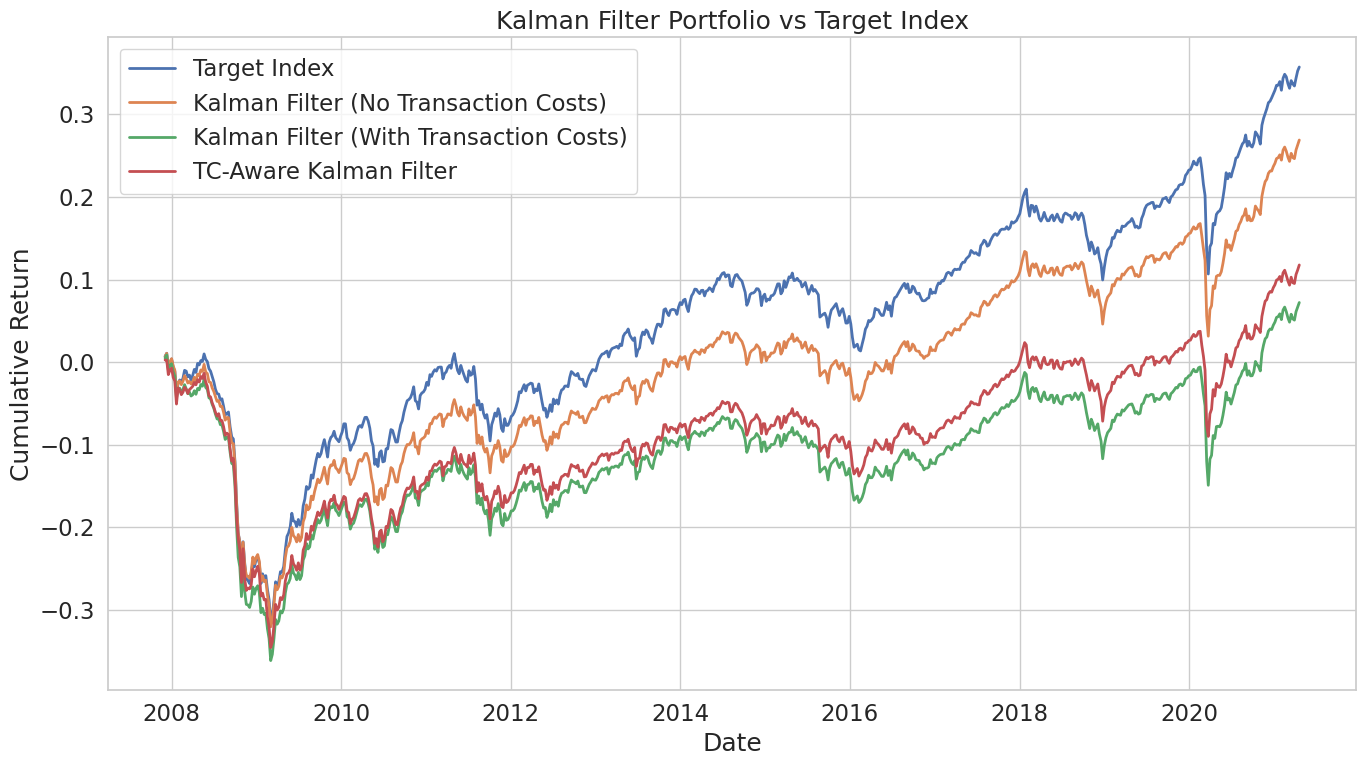

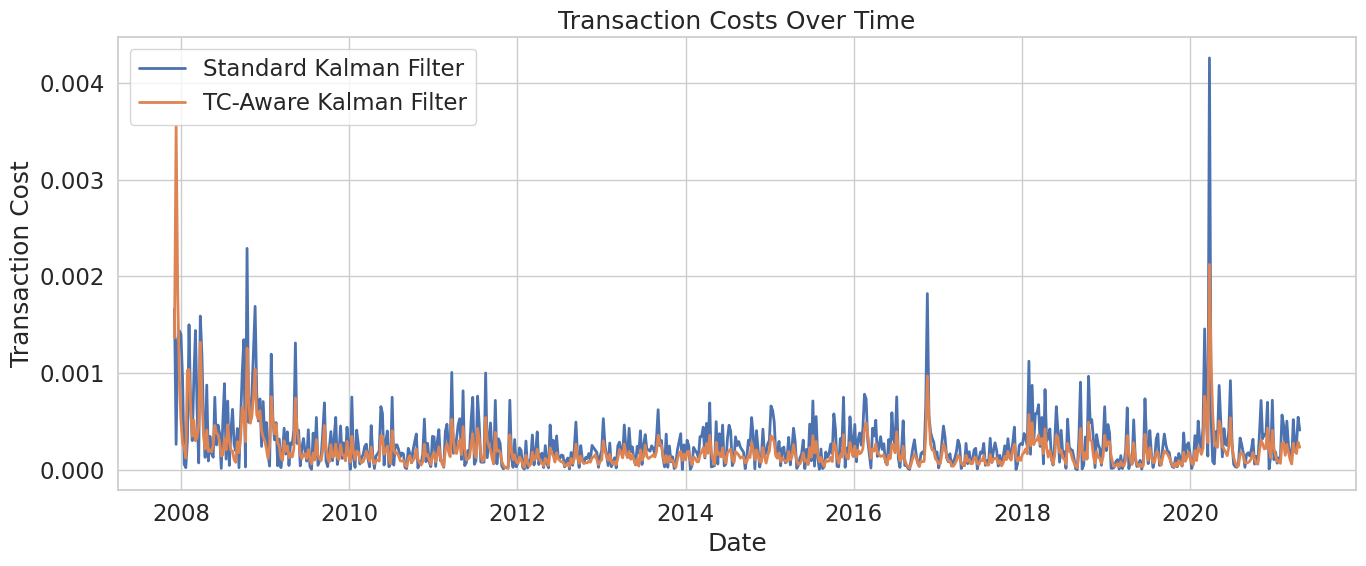

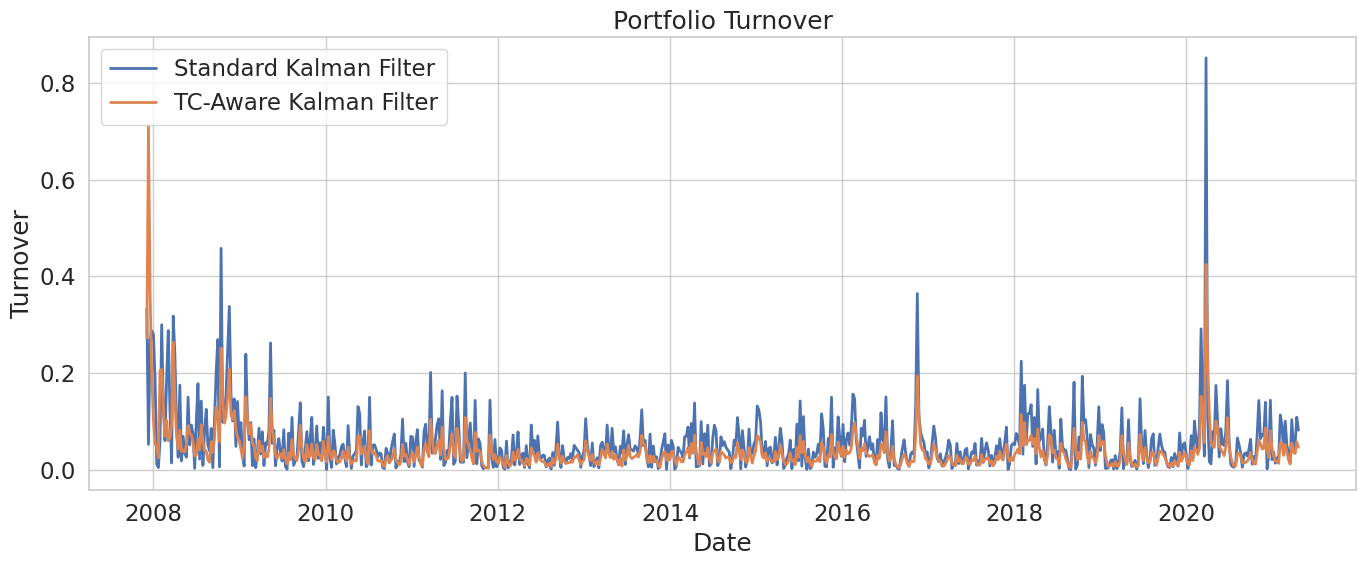

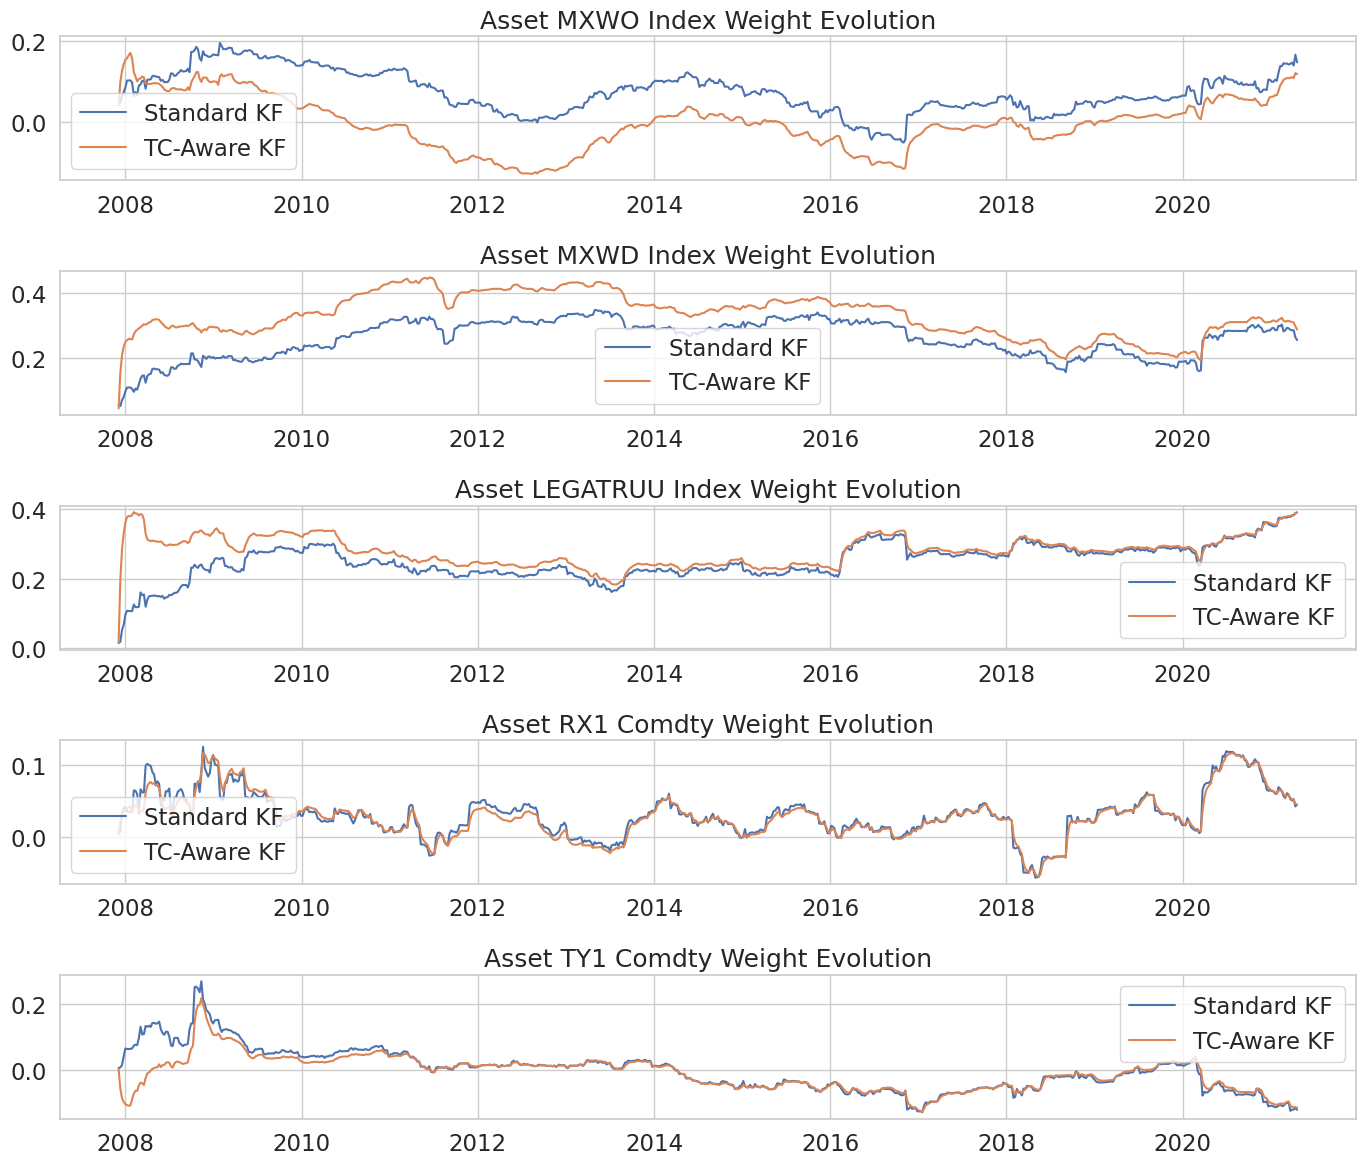

Performance Comparison:
                              No Transaction Costs  With Transaction Costs  \
Annualized Return                           0.0969                  0.0260   
Target Annualized Return                    0.1288                  0.1288   
Annualized Volatility                       0.1361                  0.1369   
Target Annualized Volatility                0.1394                  0.1394   
Sharpe Ratio                                0.7122                  0.1902   
Target Sharpe Ratio                         0.9237                  0.9237   
Tracking Error                              0.0224                  0.0234   
Information Ratio                          -1.4233                 -4.3970   
Correlation                                 0.9872                  0.9869   
Max Drawdown                               -0.2864                 -0.3138   

                              TC-Aware Optimization  
Annualized Return                            0.0424  
Target An

In [52]:
# Import necessari
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from filterpy.kalman import KalmanFilter

##############################################################
############## Data Loading ##################################
##############################################################

# Percorso al file
file_path = './data/Dataset3_PortfolioReplicaStrategyErrataCorrige.xlsx'
file_path_old = './data/Dataset3_PortfolioReplicaStrategy.xlsx'

# Read full names (row 4)
full_names_df = pd.read_excel(file_path_old, header=None, skiprows=3, nrows=1)
full_names = full_names_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Read Bloomberg tickers (row 6)
tickers_df = pd.read_excel(file_path_old, header=None, skiprows=5, nrows=1)
tickers = tickers_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Create a dictionary mapping tickers to full names
variable_info = dict(zip(tickers, full_names))

# Read the actual data without using any row as a header
data_raw = pd.read_excel(file_path, header=None, skiprows=6)

# First column is the date column
data_raw.columns = ['Date'] + tickers  # Assign the columns correctly using tickers

# Set the date column as the index and ensure it's in datetime format
data_raw['Date'] = pd.to_datetime(data_raw['Date'], format='%d/%m/%Y')
data = data_raw.set_index('Date')

df = data

##############################################################
############## Data preprocessing ############################
##############################################################

# Forza i valori a numerici e rimuovi eventuali righe con NaN
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Definizione target e predittori
# Itera su tutti i target per analisi multiple
target_indices = ['MXWO Index', 'MXWD Index', 'LEGATRUU Index', 'HFRXGL Index']
for target_col in target_indices:
    predictor_cols = [col for col in df.columns if col != target_col]

# Calcolo dei log returns
returns = np.log(df / df.shift(1)).dropna()
predictor_returns = returns[predictor_cols].values
dates = returns.index

##############################################################
############## Target Construction ###########################
##############################################################

# Target Portfolio combination
index_components = {
    'HFRXGL Index': 0.5,
    'MXWO Index': 0.25,
    'LEGATRUU Index': 0.25
}

# Calculate percentage change (returns) for the components of the target index
component_returns = data[list(index_components.keys())].pct_change().dropna()

# Initialize a DataFrame to store weighted returns for each component
weighted_returns = pd.DataFrame(index=component_returns.index)

# Multiply each component's returns by its respective weight and store in the DataFrame
for component, weight in index_components.items():
    weighted_returns[component] = component_returns[component] * weight

# Sum the weighted returns across all components to construct the target index returns
target_returns = weighted_returns.sum(axis=1)

# Rename the target returns series for clarity
target_returns.name = 'Target_Index'

##############################################################
############## Replication ###################################
##############################################################

# Ridge Regression iniziale
ridge = Ridge(alpha=1.0, fit_intercept=False)
ridge.fit(predictor_returns, target_returns)
w_init = ridge.coef_

# Setup Kalman Filter
# Determine the number of timesteps and assets from the predictor returns
n_timesteps, n_assets = predictor_returns.shape

# Initialize the Kalman Filter with the appropriate dimensions
kf = KalmanFilter(dim_x=n_assets, dim_z=1)

# Set the initial state of the filter to the Ridge regression coefficients
kf.x = w_init.reshape(-1, 1)

# Define the state transition matrix as an identity matrix (no dynamics assumed)
kf.F = np.eye(n_assets)

# Initialize the covariance matrix with small values to reflect initial uncertainty
kf.P *= 0.1

# Set the measurement noise covariance to the variance of the target returns
kf.R = np.var(target_returns)

# Define the process noise covariance matrix with small values to allow for some state evolution
kf.Q = 0.001 * np.eye(n_assets)

# Loop di filtraggio
# Initialize weights array to store Kalman Filter estimated weights
weights = np.zeros((n_timesteps, n_assets))

# Loop through each time step to apply the Kalman Filter
for t in range(n_timesteps):
    # Reshape the predictor returns for the current time step
    x = predictor_returns[t].reshape(1, -1)
    # Reshape the target return for the current time step
    y = np.array([[target_returns[t]]])
    # Set the measurement matrix H to the current predictor returns
    kf.H = x
    # Perform the prediction step of the Kalman Filter
    kf.predict()
    # Perform the update step of the Kalman Filter with the target return
    kf.update(y)
    # Store the updated state (weights) in the weights array
    weights[t] = kf.x.ravel()

# DataFrame dei pesi stimati
weights_df = pd.DataFrame(weights, index=dates, columns=predictor_cols)

##############################################################
############## Transaction Costs Implementation ##############
##############################################################

# Define transaction cost rate
transaction_cost_rate = 0.005  # 0.5% transaction cost

# Calculate weight changes for transaction costs
weight_changes = np.zeros_like(weights)
weight_changes[0] = weights[0]  # Initial weights are fully purchased
weight_changes[1:] = weights[1:] - weights[:-1]  # Changes between consecutive periods

# Calculate transaction costs for each period
transaction_costs = np.sum(np.abs(weight_changes) * transaction_cost_rate, axis=1)

# Calculate raw portfolio returns (without transaction costs)
kalman_replica_returns_raw = (predictor_returns * weights).sum(axis=1)

# Create a Series for transaction costs with dates
transaction_costs_series = pd.Series(transaction_costs, index=dates)

# Subtract transaction costs from portfolio returns
kalman_replica_returns_net = kalman_replica_returns_raw - transaction_costs

# Create Series for both raw and net returns
replica_returns_raw_series = pd.Series(kalman_replica_returns_raw, index=dates)
replica_returns_net_series = pd.Series(kalman_replica_returns_net, index=dates)

# Calculate cumulative returns
kalman_portfolio_raw = replica_returns_raw_series.cumsum()
kalman_portfolio_net = replica_returns_net_series.cumsum()

# Target cumulativo
target_index = pd.Series(target_returns, index=dates).cumsum()

##############################################################
############## Transaction Cost-Aware Optimization ###########
##############################################################

# Alternative approach: Transaction cost-aware Kalman Filter
# Initialize weights array for TC-aware approach
weights_tc_aware = np.zeros((n_timesteps, n_assets))
weights_tc_aware[0] = w_init  # Start with Ridge regression weights

# Shrinkage factor to control turnover
shrinkage_factor = 0.5  # Adjust this parameter to control turnover

# Loop through each time step
for t in range(1, n_timesteps):
    # Standard Kalman Filter prediction
    x = predictor_returns[t].reshape(1, -1)
    y = np.array([[target_returns[t]]])
    kf.H = x
    kf.predict()
    kf.update(y)
    
    # Get raw Kalman Filter weights
    raw_weights = kf.x.ravel()
    
    # Calculate potential weight changes
    weight_change = raw_weights - weights_tc_aware[t-1]
    
    # Apply shrinkage to reduce turnover
    adjusted_weights = weights_tc_aware[t-1] + shrinkage_factor * weight_change
    
    # Store the adjusted weights
    weights_tc_aware[t] = adjusted_weights

# Create DataFrame for TC-aware weights
weights_tc_aware_df = pd.DataFrame(weights_tc_aware, index=dates, columns=predictor_cols)

# Calculate weight changes for TC-aware approach
tc_aware_weight_changes = np.zeros_like(weights_tc_aware)
tc_aware_weight_changes[0] = weights_tc_aware[0]
tc_aware_weight_changes[1:] = weights_tc_aware[1:] - weights_tc_aware[:-1]

# Calculate transaction costs for TC-aware approach
tc_aware_transaction_costs = np.sum(np.abs(tc_aware_weight_changes) * transaction_cost_rate, axis=1)
tc_aware_transaction_costs_series = pd.Series(tc_aware_transaction_costs, index=dates)

# Calculate portfolio returns for TC-aware approach
tc_aware_returns_raw = (predictor_returns * weights_tc_aware).sum(axis=1)
tc_aware_returns_net = tc_aware_returns_raw - tc_aware_transaction_costs

# Create Series for TC-aware returns
tc_aware_returns_raw_series = pd.Series(tc_aware_returns_raw, index=dates)
tc_aware_returns_net_series = pd.Series(tc_aware_returns_net, index=dates)

# Calculate cumulative returns for TC-aware approach
tc_aware_portfolio_raw = tc_aware_returns_raw_series.cumsum()
tc_aware_portfolio_net = tc_aware_returns_net_series.cumsum()

##############################################################
############## Visualizzazione dei Risultati ################
##############################################################

# Grafico dei rendimenti cumulativi
plt.figure(figsize=(14, 8))
plt.plot(target_index, label='Target Index', linewidth=2)
plt.plot(kalman_portfolio_raw, label='Kalman Filter (No Transaction Costs)', linewidth=2)
plt.plot(kalman_portfolio_net, label='Kalman Filter (With Transaction Costs)', linewidth=2)
plt.plot(tc_aware_portfolio_net, label='TC-Aware Kalman Filter', linewidth=2)
plt.title("Kalman Filter Portfolio vs Target Index")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafico dei costi di transazione
plt.figure(figsize=(14, 6))
plt.plot(transaction_costs_series, label='Standard Kalman Filter', linewidth=2)
plt.plot(tc_aware_transaction_costs_series, label='TC-Aware Kalman Filter', linewidth=2)
plt.title("Transaction Costs Over Time")
plt.xlabel("Date")
plt.ylabel("Transaction Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafico del turnover di portafoglio
turnover_standard = pd.Series(np.sum(np.abs(weight_changes), axis=1), index=dates)
turnover_tc_aware = pd.Series(np.sum(np.abs(tc_aware_weight_changes), axis=1), index=dates)

plt.figure(figsize=(14, 6))
plt.plot(turnover_standard, label='Standard Kalman Filter', linewidth=2)
plt.plot(turnover_tc_aware, label='TC-Aware Kalman Filter', linewidth=2)
plt.title("Portfolio Turnover")
plt.xlabel("Date")
plt.ylabel("Turnover")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafico dell'evoluzione dei pesi per alcune attività
num_assets_to_plot = min(5, n_assets)  # Plot first 5 assets or fewer if n_assets < 5
plt.figure(figsize=(14, 12))
for i in range(num_assets_to_plot):
    plt.subplot(num_assets_to_plot, 1, i+1)
    plt.plot(weights_df.iloc[:, i], label='Standard KF')
    plt.plot(weights_tc_aware_df.iloc[:, i], label='TC-Aware KF')
    plt.title(f'Asset {predictor_cols[i]} Weight Evolution')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

##############################################################
############## Metriche di Valutazione #######################
##############################################################

def calculate_metrics(returns_series, target_series, annualization_factor=252):
    """Calculate performance metrics for a return series."""
    # Calcolo delle metriche
    mean_return = returns_series.mean() * annualization_factor
    target_mean_return = target_series.mean() * annualization_factor
    
    volatility = returns_series.std() * np.sqrt(annualization_factor)
    target_vol = target_series.std() * np.sqrt(annualization_factor)
    
    sharpe = mean_return / volatility if volatility > 0 else 0
    target_sharpe = target_mean_return / target_vol if target_vol > 0 else 0
    
    # Tracking error
    tracking_error = np.sqrt(((returns_series - target_series) ** 2).mean()) * np.sqrt(annualization_factor)
    
    # Information ratio
    information_ratio = (mean_return - target_mean_return) / tracking_error if tracking_error > 0 else 0
    
    # Correlation
    correlation = returns_series.corr(target_series)
    
    # Drawdown
    cumulative_returns = (1 + returns_series).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / rolling_max - 1
    max_drawdown = drawdown.min()
    
    return {
        'Annualized Return': mean_return,
        'Target Annualized Return': target_mean_return,
        'Annualized Volatility': volatility,
        'Target Annualized Volatility': target_vol,
        'Sharpe Ratio': sharpe,
        'Target Sharpe Ratio': target_sharpe,
        'Tracking Error': tracking_error,
        'Information Ratio': information_ratio,
        'Correlation': correlation,
        'Max Drawdown': max_drawdown
    }

# Calculate metrics for all approaches
metrics_raw = calculate_metrics(replica_returns_raw_series, target_returns)
metrics_with_tc = calculate_metrics(replica_returns_net_series, target_returns)
metrics_tc_aware = calculate_metrics(tc_aware_returns_net_series, target_returns)

# Create a DataFrame for easy comparison
metrics_df = pd.DataFrame({
    'No Transaction Costs': pd.Series(metrics_raw),
    'With Transaction Costs': pd.Series(metrics_with_tc),
    'TC-Aware Optimization': pd.Series(metrics_tc_aware)
})

print("Performance Comparison:")
print(metrics_df.round(4))

# Additional turnover statistics
average_turnover_standard = turnover_standard.mean()
average_turnover_tc_aware = turnover_tc_aware.mean()
turnover_reduction = (1 - average_turnover_tc_aware / average_turnover_standard) * 100

print(f"\nTurnover Statistics:")
print(f"Average Turnover (Standard KF): {average_turnover_standard:.4f}")
print(f"Average Turnover (TC-Aware KF): {average_turnover_tc_aware:.4f}")
print(f"Turnover Reduction: {turnover_reduction:.2f}%")

# Transaction cost savings
total_tc_standard = transaction_costs_series.sum()
total_tc_aware = tc_aware_transaction_costs_series.sum()
tc_savings = (1 - total_tc_aware / total_tc_standard) * 100

print(f"\nTransaction Cost Statistics:")
print(f"Total Transaction Costs (Standard KF): {total_tc_standard:.4f}")
print(f"Total Transaction Costs (TC-Aware KF): {total_tc_aware:.4f}")
print(f"Transaction Cost Savings: {tc_savings:.2f}%")

# Output final performance comparison
print("\nFinal Cumulative Returns:")
print(f"Target Index: {target_index.iloc[-1]:.4f}")
print(f"Kalman Filter (No TC): {kalman_portfolio_raw.iloc[-1]:.4f}")
print(f"Kalman Filter (With TC): {kalman_portfolio_net.iloc[-1]:.4f}")
print(f"TC-Aware Kalman Filter: {tc_aware_portfolio_net.iloc[-1]:.4f}")